# Jupyter matplotlib integration
In this file we will try to add **matplotlib** integration to EASE Jupyter.

In [1]:
try:
    # Python 2
    from BytesIO import BytesIO
except ImportError:
    # Python 3
    from io import BytesIO


class PlotConverter:
    '''
    IJupyterPublishable converting byte-data for image to its
    MIME-type representation.
    '''
    def __init__(self, data):
        '''
        Constructor only stores parameters to members.
        
        :param data: Byte data of the image we want to convert.
        :type data:  bytearray
        '''
        self._data = data
    
    def toMimeTypeDict(self):
        java_map = java.util.HashMap()
        java_map.put('text/plain', "<matplotlib Figure>")
        java_map.put('image/png', self._data)
        return java_map
    
    def toString(self):
        return str(self)
    
    class Java:
        implements = ['org.eclipse.ease.jupyter.kernel.handlers.IJupyterPublishable']

def plot(plotter):
    '''
    Converts data from the given pyplot object to an object that can be
    plotted in Jupyter.
    
    :param plotter:    pyplot object to be plotted.
    :type plotter:     matplotlib.pyplot
    :returns: Plottable data for Jupyter.
    :rtype:   org.eclipse.ease.jupyter.kernel.handlers.IJupyterPublishable
    '''
    # Plot data to in-memory file
    buffer = BytesIO()
    plotter.savefig(buffer, format='png')
    data = bytearray(buffer.getvalue())
    return PlotConverter(data)

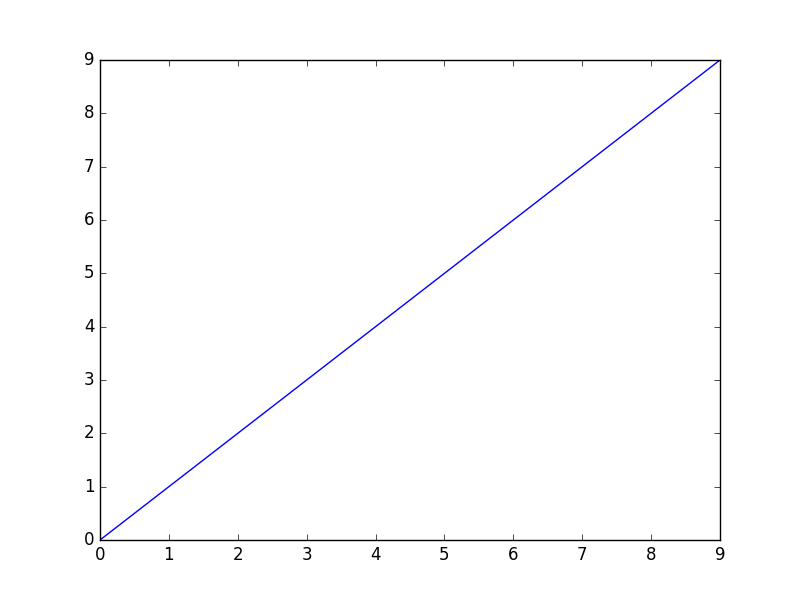

In [2]:
from matplotlib import pyplot

pyplot.plot(range(10), range(10))
plot(pyplot)